# <center> eda_and_cleaning </center>

## Load dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/IMDB_Dataset.csv")

df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Exploratory Data Analsis

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  object
 2   review_length   50000 non-null  int64 
 3   cleaned_review  50000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


### Is the date balanced and what is the length of the reviews ?

#### Is balanced ?

In [2]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

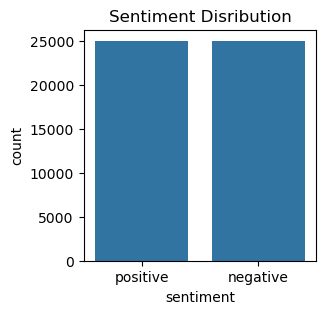

In [11]:
plt.figure(figsize=(3,3),dpi = 100)
sns.countplot(data=df, x = 'sentiment')
plt.title('Sentiment Disribution')
plt.show()

#### what is the length of the reviews?

In [13]:
df['review_length'] = df['review'].apply(len) #count by letters
df['review_length'].describe()

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64

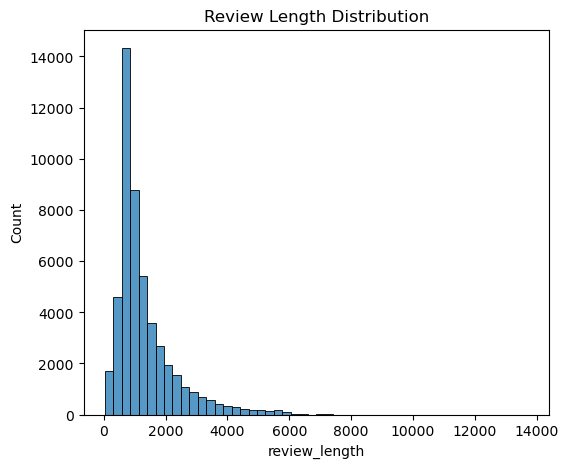

In [18]:
plt.figure(figsize=(6,5))
sns.histplot(df['review_length'], bins=50)
plt.title("Review Length Distribution")
plt.show()

#### DATA is balanced this mean we will not facing any bias 

#### there are outliers

* mean      1309.431020
* min         32.000000
* max      13704.000000

we have a large difference in lengths

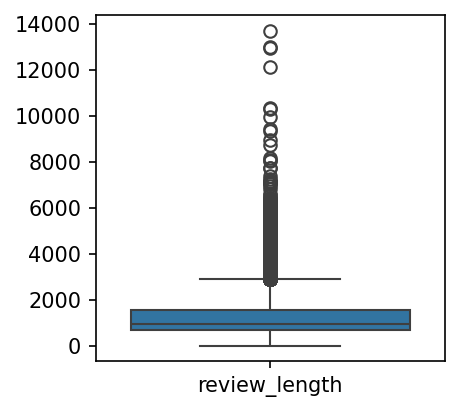

In [20]:
plt.figure(figsize=(3,3),dpi = 150)

sns.boxplot(data=df)

plt.show()

#### some info about data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  object
 2   review_length   50000 non-null  int64 
 3   cleaned_review  50000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [29]:
df.describe()

,review_length
count,50000.000000
mean,1309.431020
std,989.728014
min,32.000000
25%,699.000000
50%,970.000000
75%,1590.250000
max,13704.000000


In [ ]:
# we doesn't have null values  :)

## Cleaning & Preprocessing

In [24]:
# call my file preprocessing from folder utils

from utils.preprocessing import clean_text # i take the file copy to call the file in working folder

# Apply cleaning function
df['cleaned_review'] = df['review'].apply(clean_text)


In [25]:
# شوف أول 5 أمثلة
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


### let's convert the clean texts (cleaned_review) into a numerical representation that the model understands (TF-IDF).

## Open ***'02_feature_engineering_and_training.ipynb'***

In [30]:
df.to_csv("../data/IMDB_Dataset_cleaned.csv", index=False)